=== Summary Statistics ===
       Depth (m)  Spacing (m)  Burden (m)  Explosive_Qty (kg)   P80 (mm)  \
count  10.000000        10.00   10.000000           10.000000  10.000000   
mean   58.700000         3.50    2.960000          167.500000  40.300000   
std     8.882567         0.40    0.291357           17.360556   9.345825   
min    45.000000         3.00    2.500000          140.000000  28.000000   
25%    51.250000         3.20    2.800000          156.250000  31.250000   
50%    59.000000         3.45    2.950000          167.500000  41.000000   
75%    64.250000         3.75    3.075000          178.750000  47.250000   
max    72.000000         4.20    3.500000          200.000000  55.000000   

       P50 (mm)  
count  10.00000  
mean   26.50000  
std     5.87367  
min    19.00000  
25%    21.25000  
50%    26.50000  
75%    31.50000  
max    35.00000  


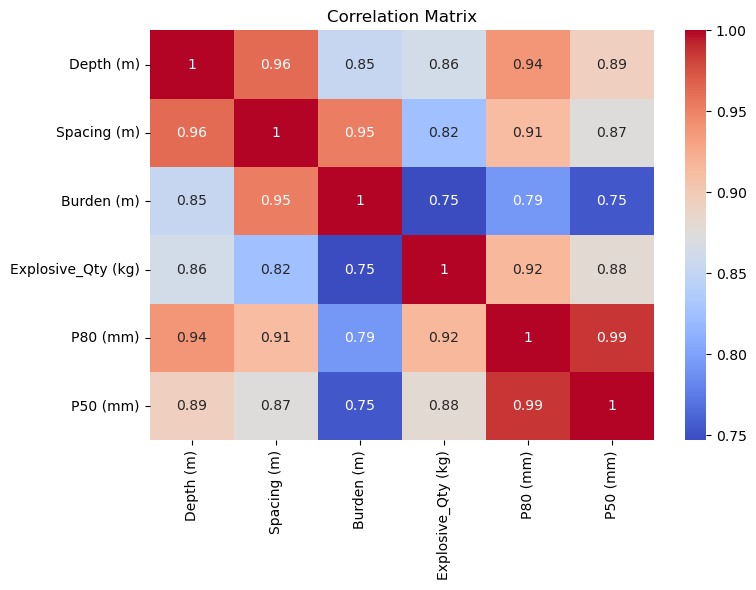

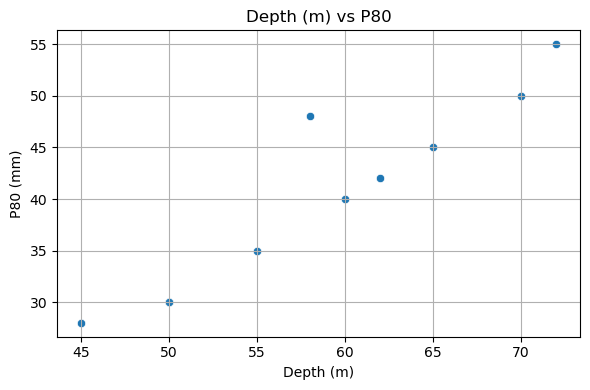

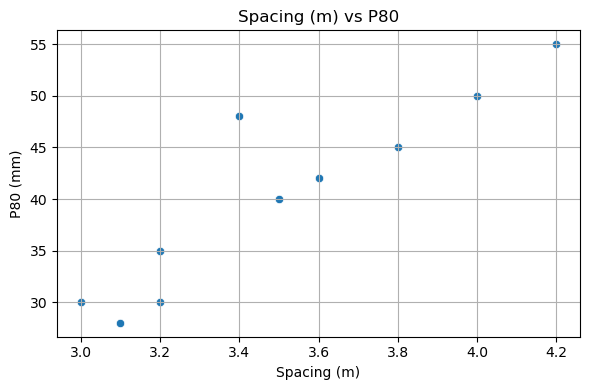

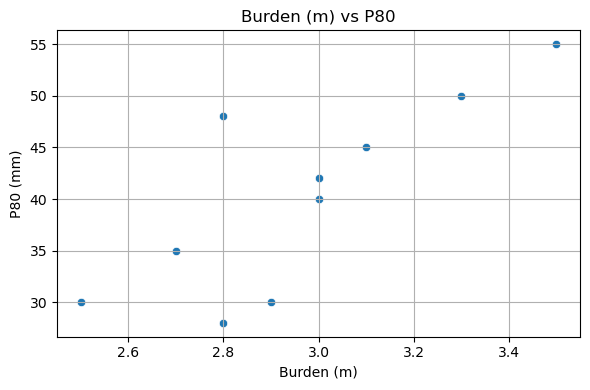

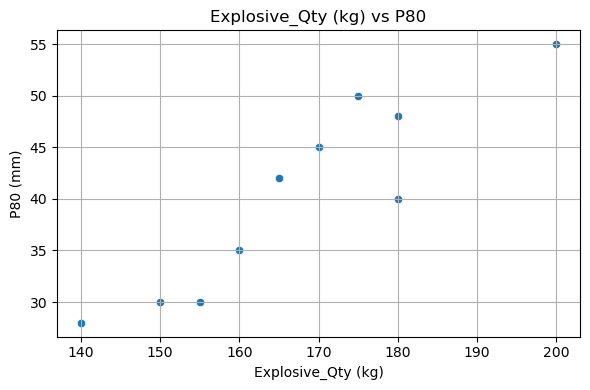


=== Regression Coefficients ===
Depth (m): -0.88
Spacing (m): 55.86
Burden (m): -38.37
Explosive_Qty (kg): 0.33
Explosive_Type_Encoded: -0.71
Intercept: -44.21
R² Score: 0.96


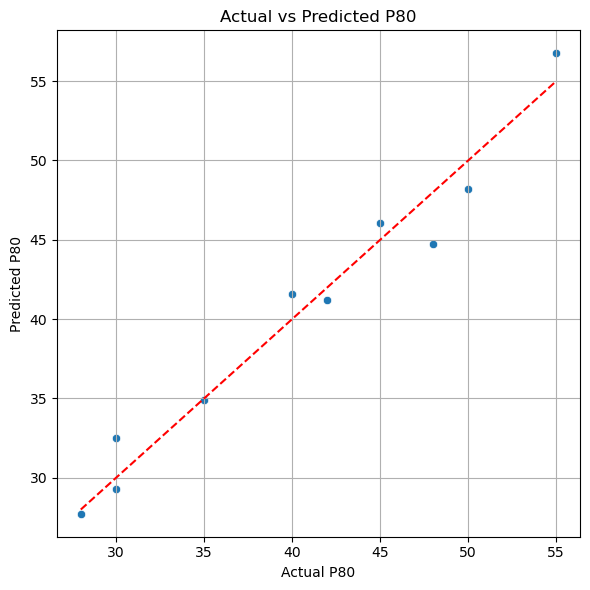

In [1]:
# drilling_blasting_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# --- Step 1: Load Sample Dataset ---
file_path = 'blast_data.csv'  # Make sure this file is in the same directory
df = pd.read_csv(file_path)

# --- Step 2: Basic EDA ---
print("=== Summary Statistics ===")
print(df.describe())

# --- Step 3: Correlation Matrix ---
corr = df[['Depth (m)', 'Spacing (m)', 'Burden (m)', 'Explosive_Qty (kg)', 'P80 (mm)', 'P50 (mm)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# --- Step 4: Scatterplots ---
params = ['Depth (m)', 'Spacing (m)', 'Burden (m)', 'Explosive_Qty (kg)']
for param in params:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[param], y=df['P80 (mm)'])
    plt.title(f'{param} vs P80')
    plt.xlabel(param)
    plt.ylabel('P80 (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Step 5: Encode Categorical Variables ---
le = LabelEncoder()
df['Explosive_Type_Encoded'] = le.fit_transform(df['Explosive_Type'])

# --- Step 6: Regression Model ---
X = df[['Depth (m)', 'Spacing (m)', 'Burden (m)', 'Explosive_Qty (kg)', 'Explosive_Type_Encoded']]
y = df['P80 (mm)']

model = LinearRegression()
model.fit(X, y)
df['Predicted_P80'] = model.predict(X)

# --- Step 7: Regression Output ---
print("\n=== Regression Coefficients ===")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# R² Score
r2 = r2_score(y, df['Predicted_P80'])
print(f"R² Score: {r2:.2f}")

# --- Step 8: Predicted vs Actual Plot ---
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df['P80 (mm)'], y=df['Predicted_P80'])
plt.plot([df['P80 (mm)'].min(), df['P80 (mm)'].max()],
         [df['P80 (mm)'].min(), df['P80 (mm)'].max()], 'r--')
plt.xlabel("Actual P80")
plt.ylabel("Predicted P80")
plt.title("Actual vs Predicted P80")
plt.tight_layout()
plt.grid(True)
plt.show()
